In [1]:
import sys, threading
import numpy as np
import random
import time
import matplotlib.pyplot as plt
sys.setrecursionlimit(10 ** 7)
threading.stack_size(2 ** 27)
random.seed(time.time())

TODOS
- Revise methods that are completely "plagiarised"
- Need a method to distrubute Keys
- Need to divide messages to blocks according to key length
- Implement Essam's revision of the brute force attack
- Implement chosen ciphertext attack

DONE
- Copied from number theory: 
  - GCD - Extended Euclid - Modular Exponentiation - Modular Inverse - Convert to Int - Convert to String - Encrypt - Decrypt
- Generate random numbers of n binary bits
- Primality Check
- The two above points are responsible for public keys
- Generate private keys from public keys


In [2]:
def GCD(a, b):
    if b == 0:
        return a
    return GCD(b, a % b)

def extendedEuclid(a, b):
    if b == 0:
        return (1, 0)
    (x, y) = extendedEuclid(b, a % b)
    k = a // b
    return (y, x - k * y)

def modularExponentiate(a, n, mod):
    if n == 0:
        return 1 % mod
    elif n == 1:
        return a % mod
    # else:
    #     b = modularExponentiate(a, n // 2, mod)
    #     b = b * b % mod
    #     if n % 2 == 0:
    #         return b
    #     else:
    #         return b * a % mod

    #revised implementation from the reference
    f = 1
    binaryB = bin(n)[2:]
    for i in range(len(binaryB)):
        f = (f*f) % mod
        if binaryB[i] == '1':
            f = (f * a) % mod
    return f

# def revisedModExpo(a,n,mod):
#     f = 1
#     binaryB = bin(n)[2:]
#     for i in range(len(binaryB)):
#         f = (f*f) % mod
#         if binaryB[i] == '1':
#             f = (f * a) % mod
#     return f

    

def modularInverse(a, n):
    (b, x) = extendedEuclid(a, n)
    if b < 0:
        b = (b % n + n) % n  # we don't want -ve integers
    return b

#TODO: change the implementation
#look up ways to change strings to ints for encryption
def ConvertToInt(message_str):  
    res = 0
    for i in range(len(message_str)):
        res = res * 256 + ord(message_str[i])
    return res

#TODO: change the implementation
#look up ways to change strings to ints for encryption
def ConvertToStr(n):
    res = ""
    while n > 0:
        res += chr(n % 256)
        n //= 256
    return res[::-1]

def Encrypt(m, e, n):
    m = ConvertToInt(m)
    c = modularExponentiate(m,e,n)
    return c

def getPrivateKey(e,p,q):
    phi_n = (p - 1) * (q - 1)
    d = modularInverse(e, phi_n)
    return d

def Decrypt(c, d, p, q):
    m = modularExponentiate(c, d, p * q)
    m = ConvertToStr(m)
    return m

In [3]:
#simple test
p = 1000000007
q = 1000000009
exponent = 23917
modulo = p * q
ciphertext = Encrypt("attack", exponent, modulo)
d = getPrivateKey(exponent,p,q)
message = Decrypt(ciphertext, d, p, q)
#print(message)

x = bin(2)[2:] #bin return 0bxx, sliced from position 2to get rid of 0b
# print(x[1])

# a = modularExponentiate(55,97,1234)
# b = revisedModExpo(55,97,1234)
# print(a,b)


In [4]:
"""
Parameter generation
on sign up generate large numbers of preferably 512 bits to be used as p and q
then generate random e such that gcd(e,phi(n)) = 1
e can be generated using nBitRandom then checking using GCD that the result is 1
d is the modular inverse of e mod(phi(n))
"""

#generating p and q
#https://www.geeksforgeeks.org/how-to-generate-large-prime-numbers-for-rsa-algorithm/
def nBitRandom(n):
    # Returns a random number of n bits
    # if n == 1 : return random.randrange(0,2)
    # elif n == 2 : return random.randrange(0,4) 
    # else: return random.randrange(2**(n-1)+1, 2**n-1)
    return random.getrandbits(n) + (2**(n-1)+1)
    # return random.getrandbits(n) 

def fermatPrimalityTest(p):
    """
    a:random integer
    p:the number to test if prime or not
    """
    if p <= 1: return False
    for _ in range(1,102):
        # a=np.random.randint(1,p,dtype=np.int64)
        a=random.randint(1,p+1)
        aPowP = modularExponentiate(a,p,p)
        if (aPowP - a) % p != 0: return False
    return True



In [5]:
"""
Brute force attack
you need to factorize large n into 2 prime factors
factorization of n is unique, once you find 2 primes ur done

"""
# brute force attack

#responsible for factorization
def bruteForceAttack(n):
    #remember the properties of factorization, we only need to try up till square root of n
    for i in range(2,int(np.sqrt(n))+1):
        if n % i == 0:
            return i

In [6]:
# Generate prime numbers less than N
def generatePrimeNumbers(N):
    # Returns a list of prime numbers less than N
    primeNumbers = []
    for i in range(2, N):
        if fermatPrimalityTest(i):  # Fermat's primality test
            primeNumbers.append(i)
    return primeNumbers

def generatePrime(n):
    if n == 1: return -1
    number = 1 
    while not fermatPrimalityTest(number):
        number = nBitRandom(n)
    return number


In [7]:
def testBruteForceTime(N):
    time_taken = []
    n_values =[]
    # Test the time it takes to brute force attack
    primeNumbers = generatePrimeNumbers(N) # Generate prime numbers less than N
    for i in range(len(primeNumbers)):
        for j in range(i+1, len(primeNumbers)):
            n_val =primeNumbers[i]*primeNumbers[j] # n = p*q
            n_values.append(n_val)
            start_time = time.time()
            bruteForceAttack(n_val) # Brute force attack
            end_time = time.time()
            time_taken.append(end_time - start_time) # Time taken to brute force attack
    return time_taken , n_values

In [8]:
# time_vals , n_vals = testBruteForceTime(10000)

In [9]:
# plt.plot(n_vals, time_vals)
# plt.xlabel('N')
# plt.ylabel('Time taken')
# plt.title('Brute Force Attack')
# plt.show()

In [10]:
#revised brute force attack
def bruteForceTime():
    n = 64
    p = 1
    q = 1
    nArray = []
    for i in range(2,int(n/2)+1):
        # for _ in range(2):
            # while (not fermatPrimalityTest(p)):
            #     p = nBitRandom(i)
            # while (not fermatPrimalityTest(q)):
            #     q = nBitRandom(i)
        p = generatePrime(i)
        q = generatePrime(i)
        nArray.append(p*q)
    return nArray

    # time_taken = []
    # for n_val in nArray:
    #     start_time = time.time()
    #     bruteForceAttack(n_val ) # Brute force attack
    #     end_time = time.time()
    #     time_taken.append(end_time - start_time) # Time taken to brute force attack
    # return nArray, time_taken

bruteForceTime()
    

[15,
 77,
 323,
 1369,
 3233,
 14359,
 52447,
 157609,
 931831,
 3275861,
 14092405,
 69113791,
 192383953,
 1398496873,
 5175220487,
 14796805937,
 29180212879,
 195325360799,
 476837093077,
 2220368731897,
 25988264710207,
 103162177149487,
 306393550960843,
 1480897834769729,
 2966652627829711,
 13578799079380771,
 27951608766239789,
 374220765062455439,
 436860319151467711,
 2930703112792423933,
 14954038495052484283]

In [17]:
x = nBitRandom(64)
x = (bin(x)[2:])
y = len((x))
print(x,y)
x = nBitRandom(32)
y = nBitRandom(32)
n = x*y
print(bin(n)[2:],len(bin(n)[2:]))

1001011001111010100101111111011100011100001010101011010010100000 64


In [ ]:
nArray, time_taken = bruteForceTime()

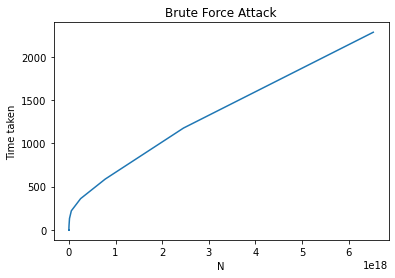

In [35]:
plt.plot(nArray, time_taken)
plt.xlabel('N')
plt.ylabel('Time taken')
plt.title('Brute Force Attack')
plt.show()